In [48]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
df = pd.read_csv("../dataset/laptops_cleaned.csv")

In [50]:
df.shape

(1303, 17)

In [51]:
X = df.drop(columns=["Price_euros"])
y = df["Price_euros"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1303, 16)
y shape: (1303,)


In [59]:
categorical_cols = ['Company', 'Product', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand']
numerical_cols = ['Inches','Ram','Weight','SSD','HDD','Hybrid','Flash_Storage','Touchscreen','X_res','Y_res']

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(X[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_col_names)

X_final = pd.concat([X[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

import joblib

joblib.dump(encoder, "../encoders/encoder.pkl")


['../encoders/encoder.pkl']

In [53]:
# Use X_final for train-test split (after encoding categorical columns)
X_train, X_test, y_train, y_test = train_test_split(X_final, y,
                                                    test_size=0.35,
                                                    random_state=2)
print("X_train:", X_train.shape,
      "X_test:", X_test.shape)

X_train: (846, 663) X_test: (457, 663)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data (now numeric)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


MSE: 113268.87
R2 Score: 0.71


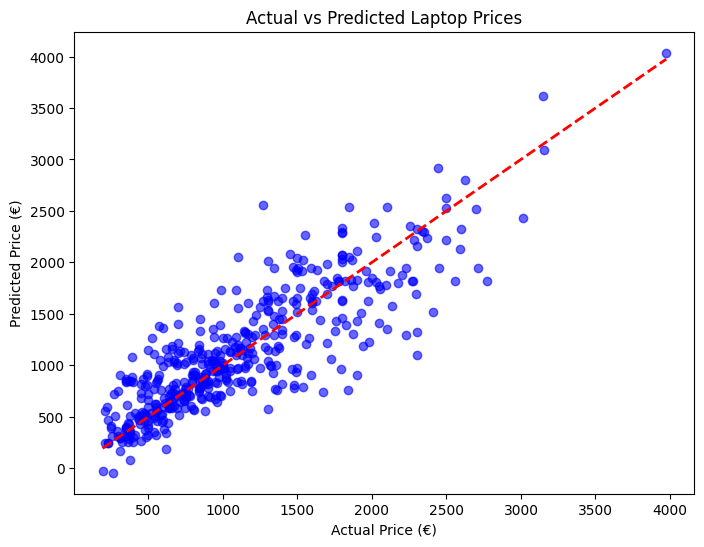

In [56]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # diagonal line
plt.xlabel('Actual Price (€)')
plt.ylabel('Predicted Price (€)')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()


In [57]:
import joblib
joblib.dump(model, "../encoders/laptop_price_model.pkl")


['../encoders/laptop_price_model.pkl']